In [16]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")


In [2]:
data=pd.read_csv('concrete_data.csv')

In [3]:
data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
data.tail()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [5]:
data.shape
print('number of rows ',data.shape[0])
print('number of column ',data.shape[1])

number of rows  1030
number of column  9


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
data.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [8]:
data.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


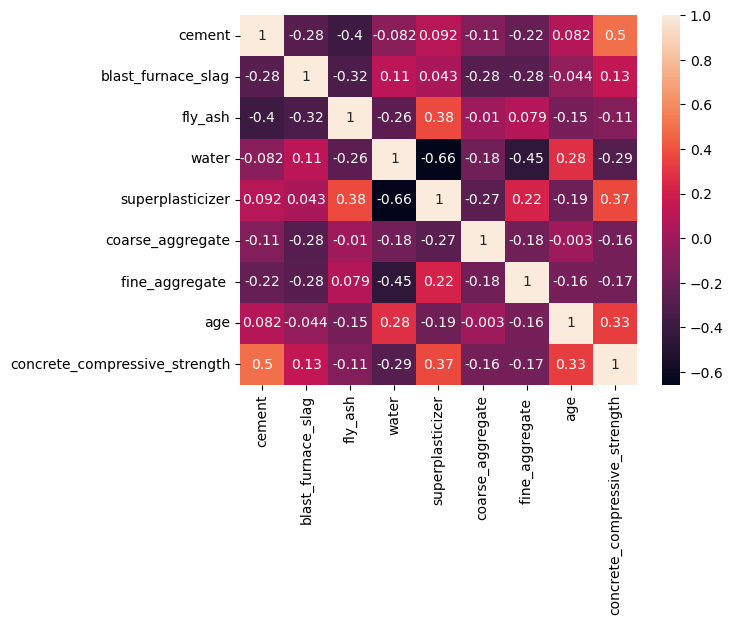

In [9]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [17]:
data.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

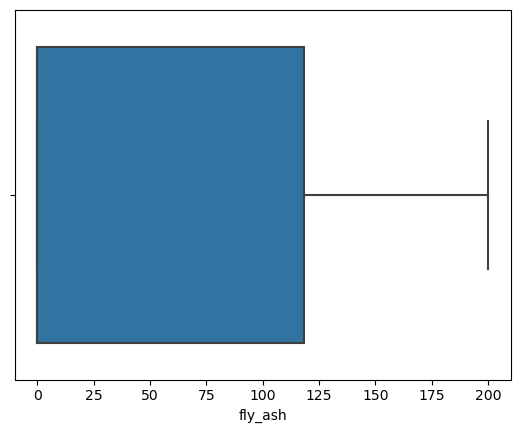

In [24]:
sns.boxplot(data['fly_ash'])
plt.show()

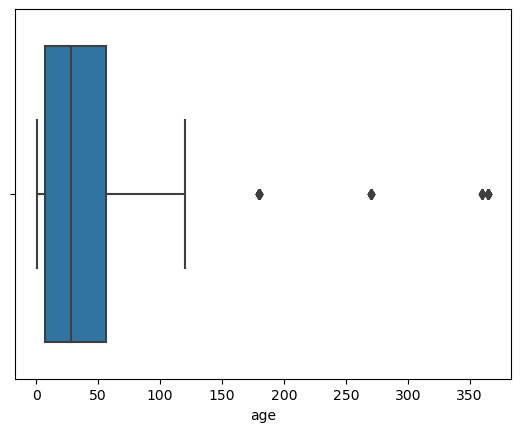

In [28]:
sns.boxplot(data['age'])
plt.show()
#there are outliers in age 

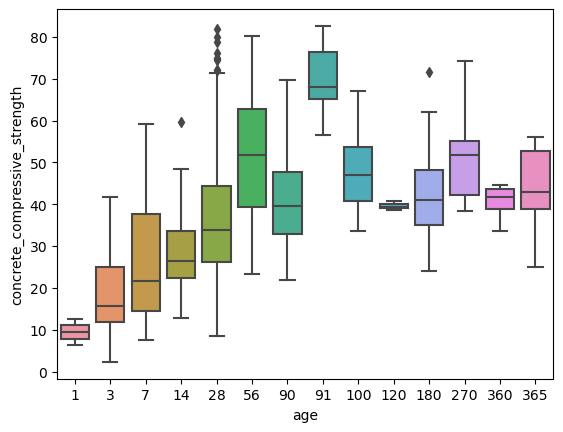

In [34]:
sns.boxplot(data=data,x='age',y=data["concrete_compressive_strength"])
plt.show()

In [12]:
X=data.drop('concrete_compressive_strength',axis=1)
y=data['concrete_compressive_strength']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20 ,random_state=40)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [45]:
lr=LinearRegression()
lr.fit(X_train,y_train)

rm=RandomForestRegressor()
rm.fit(X_train,y_train)

gb=GradientBoostingRegressor()
gb.fit(X_train,y_train)


GradientBoostingRegressor()

In [54]:
y_pred1 =lr.predict(X_test)
y_pred2 =rm.predict(X_test)
y_pred3 =gb.predict(X_test)

In [55]:
from sklearn import metrics

In [56]:
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)

In [57]:
print(score1)
print(score2)
print(score3)


0.517912068519028
0.8906640683946745
0.8870229376547439


In [61]:
final_data=pd.DataFrame({'models':['LR','RM','GB'],'R2_score':[score1*100,
                                                    score2*100,
                                                   score3*100]})

In [62]:
final_data
#Random forest Regressor gives most accurate result 

,models,R2_score
0,LR,51.791207
1,RM,89.066407
2,GB,88.702294


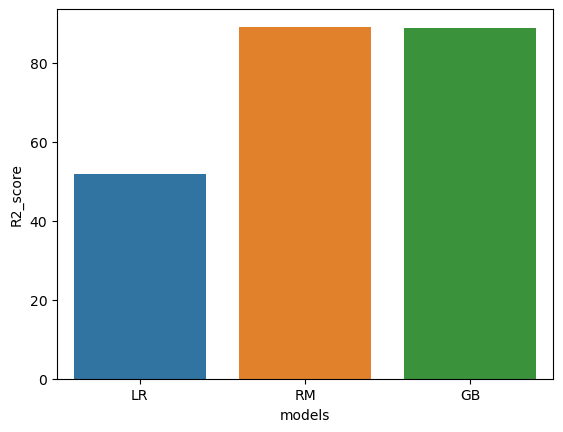

In [64]:
sns.barplot(final_data['models'],final_data['R2_score'])
plt.show()

In [66]:
import joblib
joblib.dump(rm,'Concrete Compressive Strength Prediction')

['Concrete Compressive Strength Prediction']

In [67]:
model=joblib.load('Concrete Compressive Strength Prediction')

In [71]:
from tkinter import *
def show_entry():
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())
    p8 = float(e8.get())

    model = joblib.load('Concrete Compressive Strength Prediction')
    df = pd.DataFrame({
    'cement':p1,
    'blast_furnace_slag':p2,
    'fly_ash':p3,
    'water':p4,
    'superplastisizer':p5,
    'coarse_aggregate':p6,
    'fine_aggregate':p7,
    'age':p8
},index=[0])
    result = model.predict(df)
    
    Label(master, text="Concrete Compressive Strength is").grid(row=31)
    Label(master, text=result).grid(row=32)
    print("Concrete Compressive Strength Prediction", result)
    
master =Tk()
master.title("Concrete Compressive Strength Prediction Using Machine Learning")
label = Label(master,text = "Concrete Compressive Strength Prediction",bg = "black",
               fg = "white").grid(row=0,columnspan=2)

Label(master,text = "cement").grid(row=1)
Label(master,text = "blast_furnace_slag").grid(row=2)
Label(master,text = "fly_ash").grid(row=3)
Label(master,text = "water").grid(row=4)
Label(master,text = "superplasticizer").grid(row=5)
Label(master,text = "coarse_aggregate").grid(row=6)
Label(master,text = "fine_aggregate ").grid(row=7)
Label(master,text = "age").grid(row=8)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)

Button(master,text="Predict",command=show_entry).grid()

mainloop()

Concrete Compressive Strength Prediction [59.61065]
Concrete Compressive Strength Prediction [39.9551]
